# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

input :Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors
    
output : Number of predicted wins (W)

# import library

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


In [19]:
df=pd.read_csv("Baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [20]:
df["W"].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

Number of predicted wins(w) is our target column. When we check the value_counts of column 'w' ,we can understand that it is a regression type dataset.

In [21]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. There is no missing value.
2. Here we can see that mean is higher than the standard deviation in all the columns so datas are highly spreaded.
3. Relationship between mean and median(50%):
    
    column w : median is little bit higher than maen so it is left skewed.
    
    column R : Here also median is higher than mean.
    
    columns AB : mean is higher than median so right skewed.
   
    column H : mean is higher.
    
    column 2B: median is higher.
    
    column 3B :normal.
    
    column HR : mean is higher.
    
    column BB : median is higher.
    
    column SO : median is higher.
    
    column SB : normal.
    
    column RA: median is higher.
    
    column ER: median is higher.
    
    column ERA : median is higher.
    
    column CG : mean is littile bit higher.
    
    column SHO : median is higher.
    
    column SV : mean is higher.
    
    column E : mean is higher. 
4.  There is differents in 75% percentile and max in all the columns but higher differents can see columns(R,AB,H,BB,SO,RA,ER)
5 . Through these above observation we can conclude that there is outlier in some  columns.

In [22]:
df.shape

(30, 17)

we have 30 rows and 17 columns

In [23]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns have integer type data except ERA 

In [24]:
# lets check unique value
df.apply(lambda x: len(x.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

here only Column CG is categorical

<AxesSubplot:>

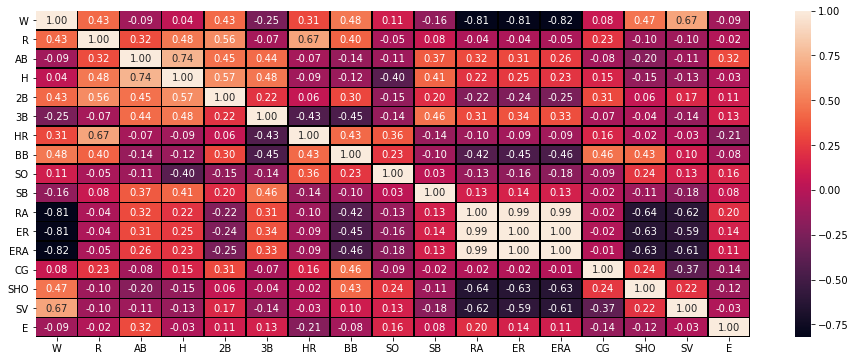

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

Here we can see that winner(W) and saves(SV)are highly correlated.Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA) these three columns are highly negative correlated with target column.At Bats(AB), Hits(H) these two columns are highly correlated with each other. 

In [26]:
# lets drop negative correlated features
df.drop(columns=['RA','ER','ERA'],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>],
       [<AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

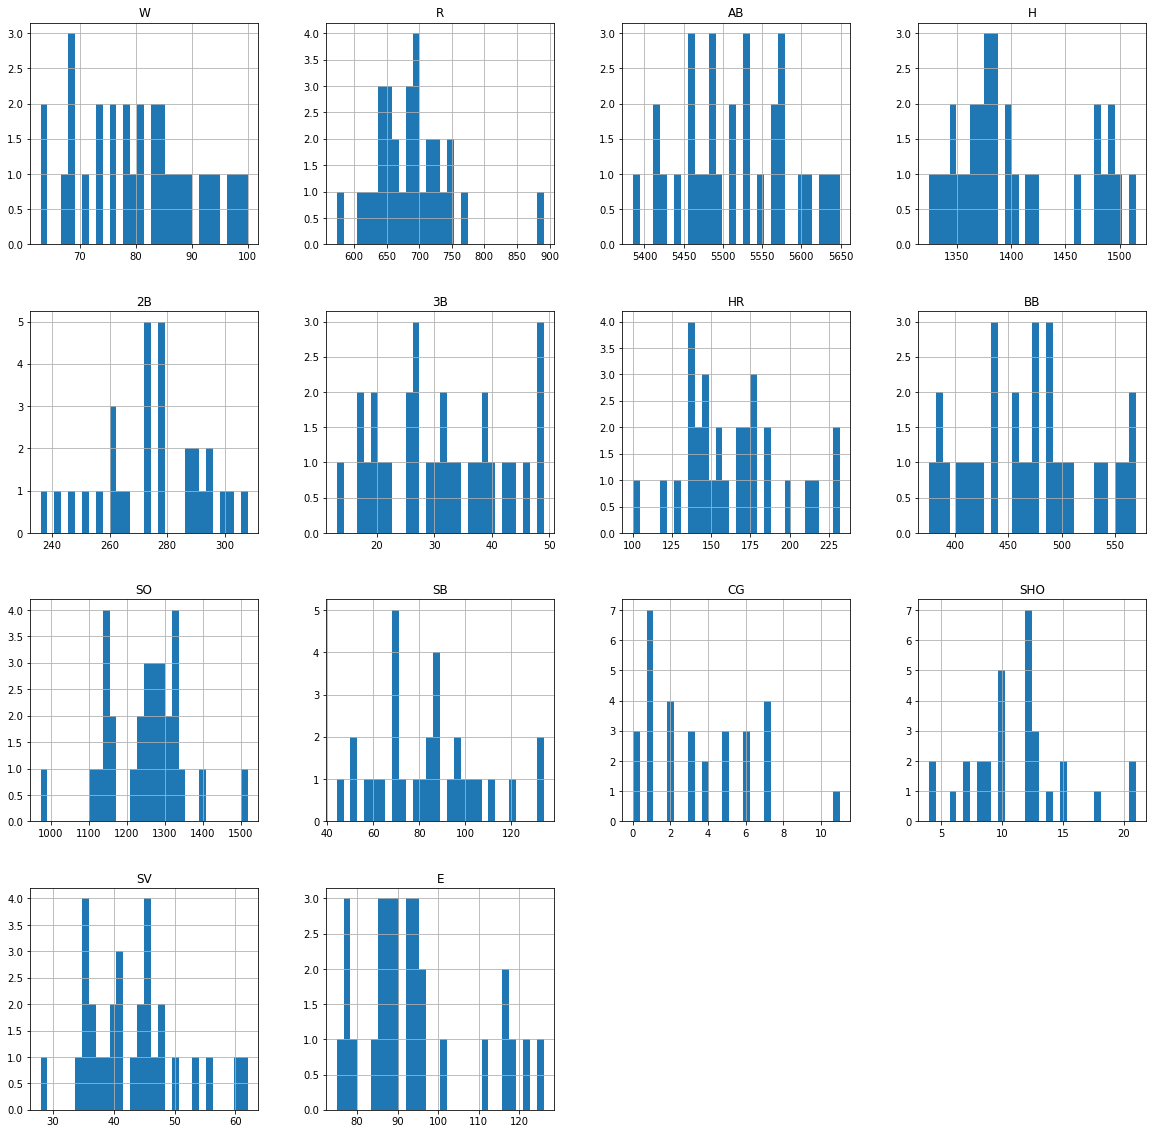

In [27]:
df.hist(figsize=(20,20),grid = True, layout =(4,4),bins=30)

 Almost the bar plot can similar to normal curve

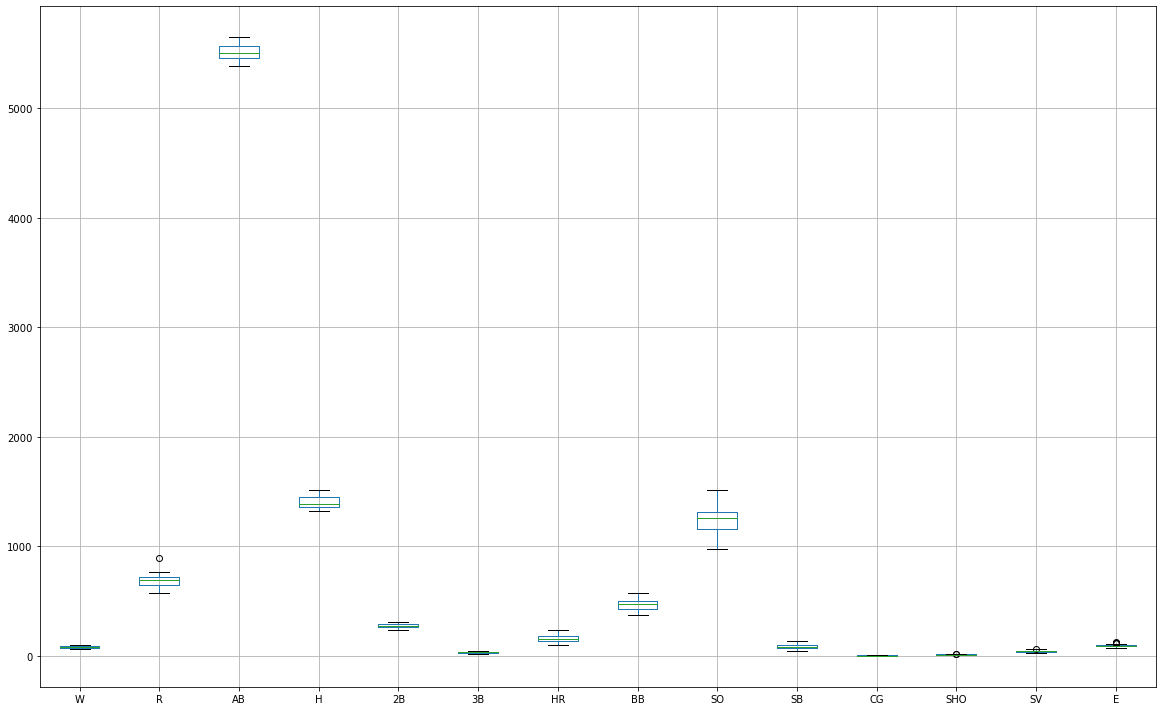

In [28]:
df.boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

Columns SHO,SV and E can see the outlier. 

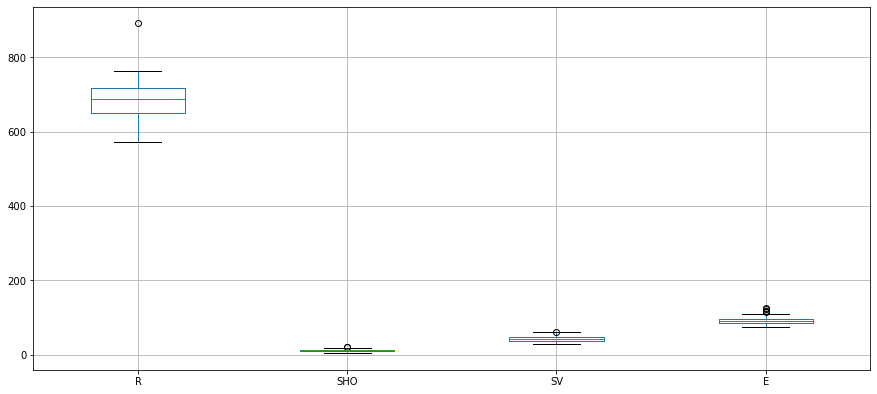

In [29]:
df[["R","SHO","SV","E"]].boxplot(figsize=(15,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

# outlier

In [30]:
# zscore value measurment
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [31]:
# lets check the presence of outlier

print('shape before removing the outlier:',df.shape)

df_new=df[(zscr<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",df_new.shape)

shape before removing the outlier: (30, 14)
shape after removing the outlier: (29, 14)


now we have drop one row for outlier

# Skewness

In [32]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

features H,CG,SV and E can see the skewness.lets remove the skewness

In [33]:
df_new["H"]=np.sqrt(df_new["H"])
df_new["CG"]=np.sqrt(df_new["CG"])
df_new["SV"]=np.sqrt(df_new["SV"])
df_new["E"]=np.sqrt(df_new["E"])

In [34]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG    -0.260678
SHO    0.526943
SV     0.370280
E      0.714966
dtype: float64

NOW Almost columns skewnes are reduced

In [35]:
df=df_new

In [36]:
# split the data as input and output
x = df.drop(columns=["W"],axis=1)
y =df["W"]

In [37]:
scal = StandardScaler()
x = scal.fit_transform(x)

now the datatype in single format using standard scaler

In [38]:
max_r_score=0
for r_state in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  1  is:  0.4678547592660559
r2_score corresponding to random state:  2  is:  -1.056916416926422
r2_score corresponding to random state:  3  is:  0.7604351224800996
r2_score corresponding to random state:  4  is:  0.3829615210116608
r2_score corresponding to random state:  5  is:  -0.03531598233456412
r2_score corresponding to random state:  6  is:  0.6316446093824142
r2_score corresponding to random state:  7  is:  0.3685778641255265
r2_score corresponding to random state:  8  is:  0.4031644101799846
r2_score corresponding to random state:  9  is:  -0.1709021114021987
r2_score corresponding to random state:  10  is:  -0.4927388892311242
r2_score corresponding to random state:  11  is:  -0.8379157831791306
r2_score corresponding to random state:  12  is:  -0.6191065731793746
r2_score corresponding to random state:  13  is:  -0.20052825228509197
r2_score corresponding to random state:  14  is:  0.14014810035179093
r2_score corresponding to random s

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=67,test_size=0.20)

# Lasso

In [40]:
ls=Lasso(alpha=0.0001)
ls=Lasso(alpha=1.0) #default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7463751885541585

In [41]:
ls.coef_

array([ 2.1319263 , -0.        , -0.        ,  0.45447633, -0.08689013,
        0.        ,  0.47449073,  0.        , -0.        , -0.        ,
        2.24601476,  5.20146557,  0.        ])

Lasso will minimise the co efficient value to zero 

# LinearRegression

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("r2_score:",r2_score(y_test,pred))
print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.8213886753099907
MSE: 5.356947467248628


In [43]:
parameter={'fit_intercept':['bool'],
          'n_jobs':np.arange(2,10),}
gcv=GridSearchCV(LinearRegression(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'fit_intercept': 'bool', 'n_jobs': 2}

In [44]:
final_mod =LinearRegression(n_jobs=2,fit_intercept='bool')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

82.13886753099906


In [45]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

-0.1497835158368923

# SVR

In [46]:
def svrkernel(ker):
    svr = SVR(kernel=ker)
    svr.fit(x_train,y_train)
    svr.score(x_train,y_train)
    pred=svr.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))

In [47]:
svrkernel('linear')

r2_score: 0.6927102080198122
MSE: 7.026466151498218


In [48]:
svrkernel('poly')

r2_score: 0.012209944110222692
MSE: 12.59781471709641


In [49]:
svrkernel('rbf')

r2_score: 0.05494363633991273
MSE: 12.32229912643689


 so in this svr model kernel= linear is the best parameter

In [50]:
parameter ={'kernel':["linear","rbf","poly","sigmoid"],
          'gamma':["scale","auto"],
           'epsilon':[0.001,0.0001,0.1,0.11,1.0,0.01]}
gcv=GridSearchCV(SVR(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [51]:
final_mod =SVR(epsilon=1.0,gamma='scale',kernel='linear')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

70.68767523669506


In [52]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

-0.2966281433954077

# DecisionTreeRegressor

In [53]:
def treespliter(split):
    tree = DecisionTreeRegressor(splitter=split)
    tree.fit(x_train,y_train)
    tree.score(x_train,y_train)
    pred=tree.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))

In [54]:
treespliter('best')

r2_score: 0.6307053941908713
MSE: 7.702813338860896


In [55]:
treespliter('random')

r2_score: 0.34024896265560167
MSE: 10.295630140987


In [56]:
parameter = {"criterion":["mse","friedman_mse","mae","poisson"],
           "splitter":["best","random"],
            "max_depth" :np.arange(2,20)}
gcv=GridSearchCV(DecisionTreeRegressor(),parameter,cv=3)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mae', 'max_depth': 8, 'splitter': 'random'}

In [57]:
final_mod =DecisionTreeRegressor(criterion='mse',max_depth=2,splitter='random')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

9.911508171733441


In [58]:
crs = cross_val_score(final_mod,x,y,cv=5,scoring='r2').mean()
crs

-1.201707705868047

# Ensemple Technic

bagging

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))


0.6783117219917014


boosting

In [60]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(n_estimators=100)
ab.fit(x_train,y_train)
predrf=ab.predict(x_test)
print(r2_score(y_test,predrf))


0.6545643153526971


 ----LinearRegression is the best model.
 
 ---r2 score is 82.
 
 ---After that improving the performense of the model try to use gridsearchcv with parameters but can't notice no more           
    improvment 
    
 ---try to boosting the performance also try to ensemble method.   

# Save model

In [61]:
import joblib
joblib.dump(LinearRegression(),"lrg.obj")

['lrg.obj']